<a href="https://colab.research.google.com/github/Vartika001/Spam-or-not-spam-classifier/blob/main/spam_not_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




# New Section

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^{th}$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [23]:
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
    words = list(email.split(" "))
    for word in words:
        if word == '':
            words.remove('')
    return words
    

In [25]:
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(words):
    porter = PorterStemmer()
    stem_words = []
    for word in words:    
        stem_words.append(porter.stem(word))
    return stem_words
    

In [26]:
# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(stem_words):
    stop_words = set(stopwords.words('english'))
    stem_no_stop_words = [word for word in stem_words if not word in stop_words]
    return stem_no_stop_words


In [27]:
# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(stem_words):
    for word in stem_words:
        if word == '':
            stem_words.remove('')
    vocab = set(stem_words)
    return vocab


In [28]:
# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stem_words, vocab):
    email_bow = []
    for word in vocab:
        if word in stem_words:
            email_bow.append(1)
        else:
            email_bow.append(0)
    return email_bow


In [29]:
# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()
def read_data():
    with open('spam_or_not_spam.csv', 'r') as file:
        results = []
        for line in file:
            words = line.split(',')
            words[1] = words[1].strip('\n')
            results.append([words[0], words[1]])
        results.pop(0)
    
    # Converting emails to Bag-of-words representation
    total_words = []  # for creating the vocabulary
    total_stem_words = []
    for data in results:
        email = data[0]
        words = read_email(email)
        stem_words = stemming(words)
        stem_no_stop_words = remove_stop_words(stem_words)
        total_words += stem_no_stop_words
        vocab = build_vocabulary(total_words)
        total_stem_words.append(stem_no_stop_words)
    
    for i in range(len(results)):
        results[i][0] = get_bow(total_stem_words[i], vocab)
        
    return results, vocab


In [30]:
data, vocab = read_data()

### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.rcParams["figure.figsize"] = (100,50)

# Customize matplotlib
plt.rcParams.update(
    {
        'text.usetex': False,
        'axes.titlesize' : 'xx-large',  # fontsize of the axes title
        'axes.labelsize' : 'x-large',  # fontsize of the x any y labels
    }
)

In [33]:
# visualize data distribution
def data_vis(data, vocab):
    # Visualize the frequency of word-occurence in all the emails(spam + non-spam)
    
    frequency_all = {}
    vocab = list(vocab)
    for i in range(len(vocab)):
        total = 0
        for j in range(len(data)):
            total += data[j][0][i]
            
        frequency_all[vocab[i]] = total / len(vocab)
        
    items = frequency_all.items()
    items = sorted(items)
    x, y = zip(*items)

    plt.plot(x, y)
    plt.title("Frequency of Word Occurence in all the emails")
    plt.xlabel("Words in all the emails")
    plt.ylabel("Frequency of occurence")
    plt.show()
    return

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36935 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27599 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24191 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21578 missing from current font.
  font.set_

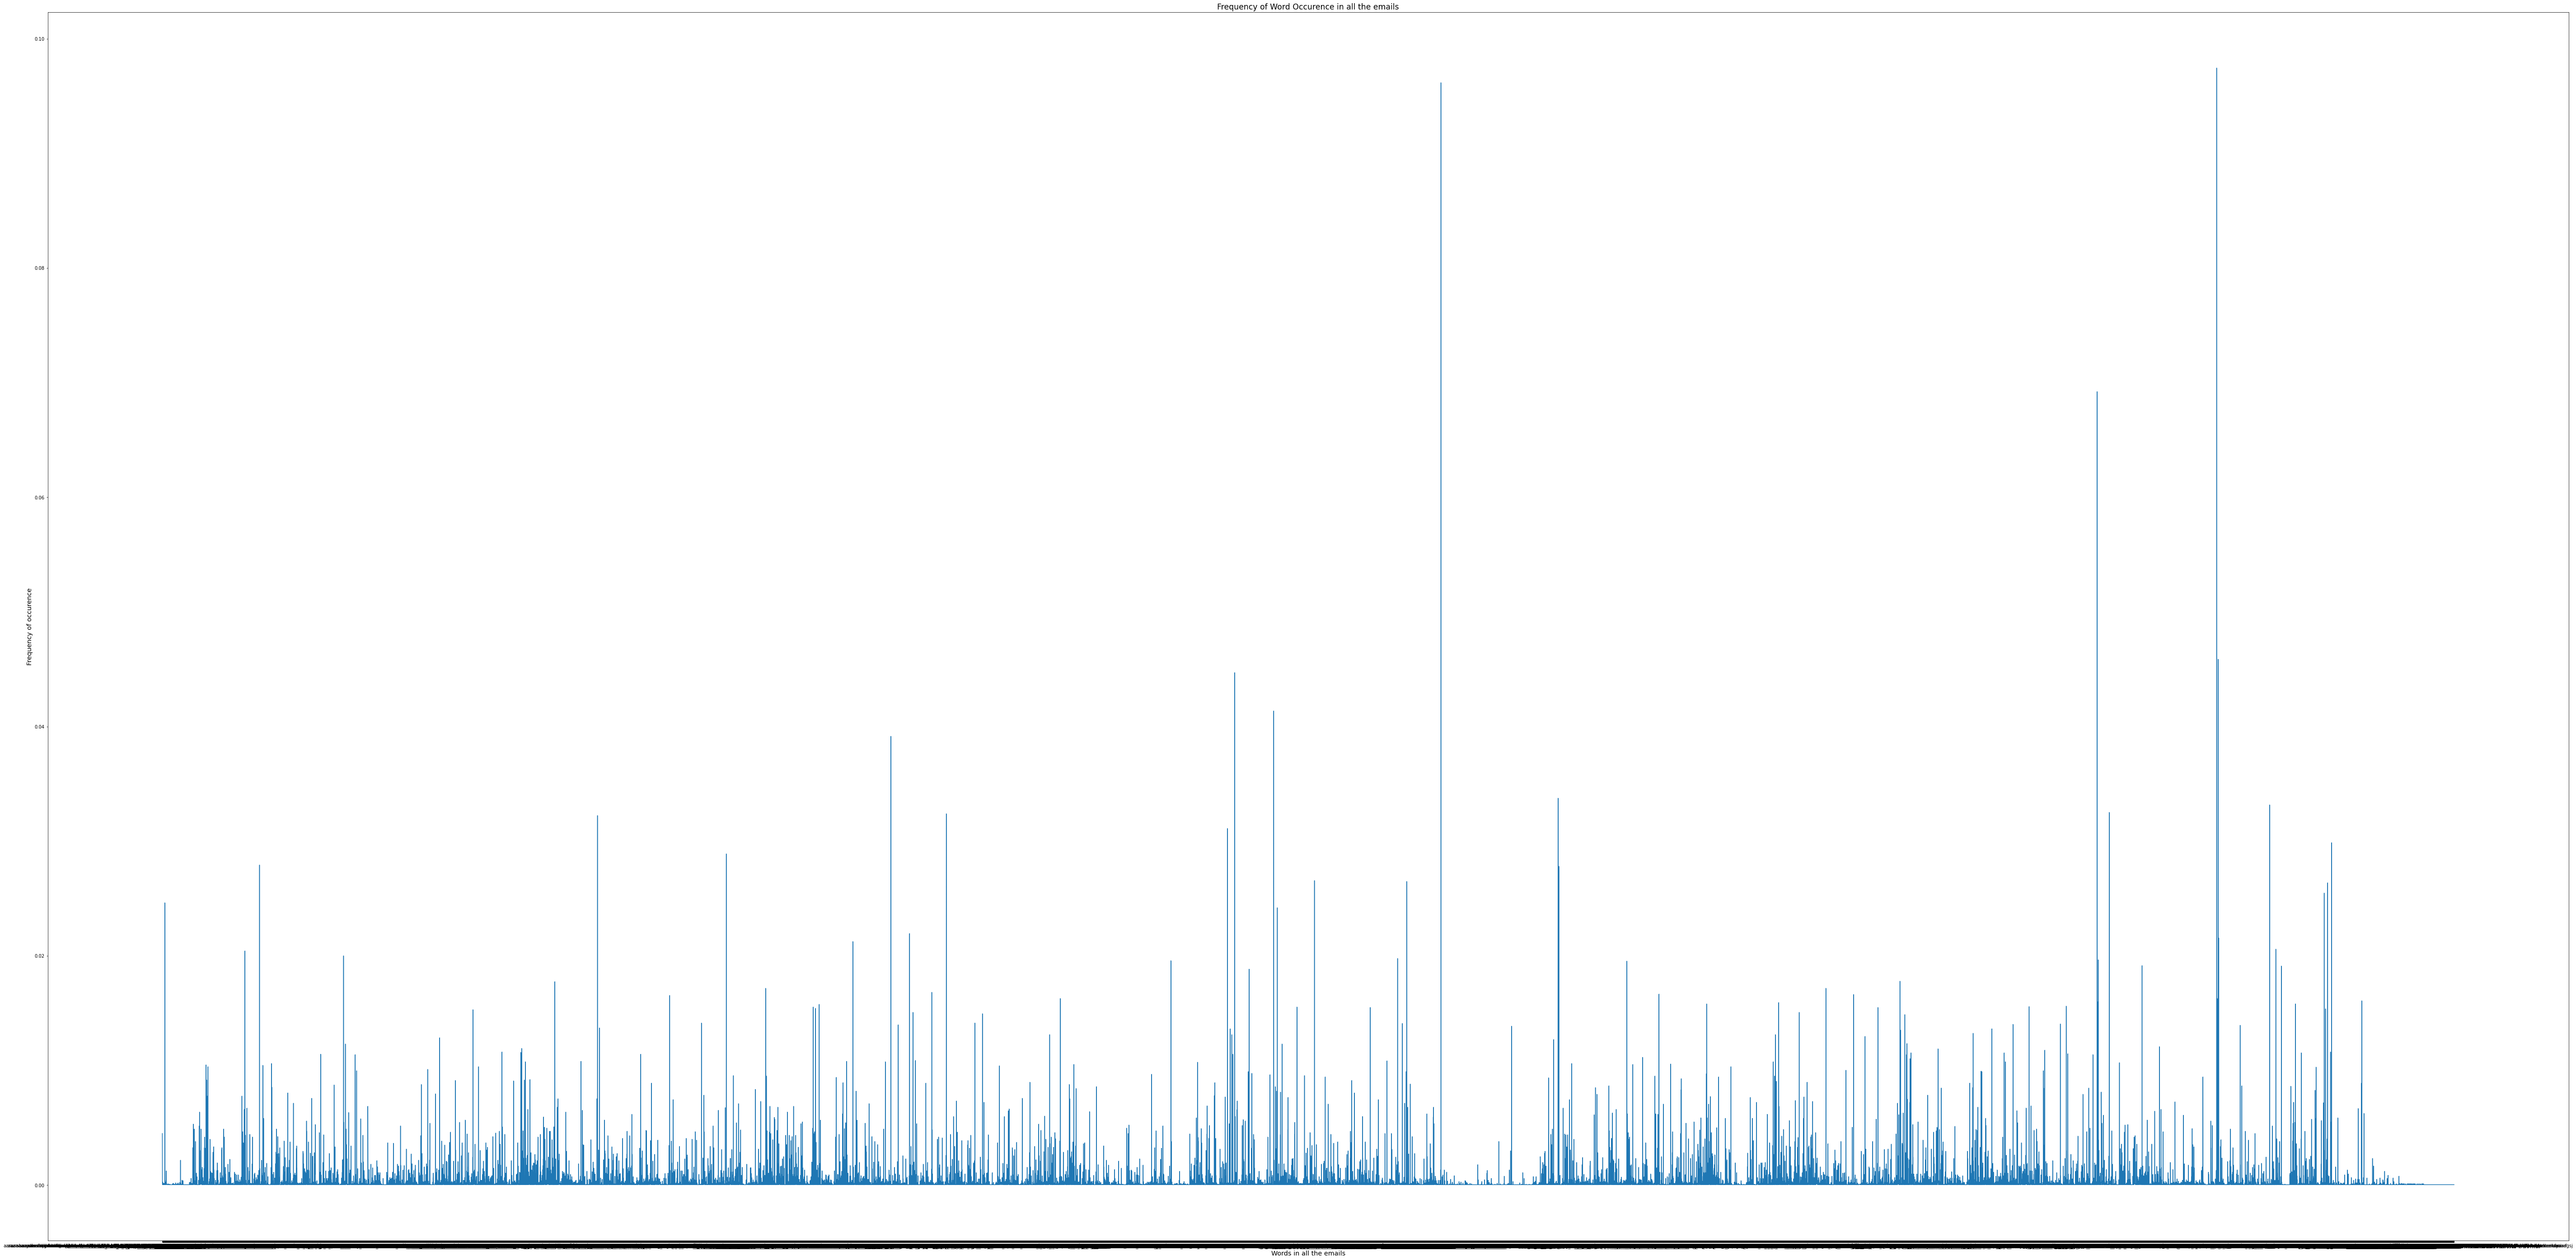

In [34]:
data_vis(data, vocab)

In [35]:
# visualize data distribution
def data_vis_sep(data, vocab):
    # Visualize the frequency of word-occurence for spam and non-spam emails separately
    
    frequency_nspam = {}
    frequency_spam = {}
    vocab = list(vocab)
    for i in range(len(vocab)):
        total_nspam = 0
        total_spam = 0
        for j in range(len(data)):
            if data[j][1] == '0':
                total_nspam += data[j][0][i]
            elif data[j][1] == '1':
                total_spam += data[j][0][i]
            
        frequency_nspam[vocab[i]] = total_nspam / len(vocab)
        frequency_spam[vocab[i]] = total_spam / len(vocab)
        
    item_s = frequency_spam.items()
    item_s = sorted(item_s)
    x_s, y_s = zip(*item_s)
    
    item_n = frequency_nspam.items()
    item_n = sorted(item_n)
    x_n, y_n = zip(*item_n)
    
    fig, axs = plt.subplots(2)

    axs[0].plot(x_s, y_s)
    fig.suptitle("Frequency of Word Occurence in all spam and non-spam emails")
#     axs[0].xlabel("Words in all spam emails")
#     axs[0].ylabel("Frequency of occurence")
    axs[1].plot(x_n, y_n)
#     axs[1].xlabel("Words in all non-spam emails")
#     axs[1].ylabel("Frequency of occurence")
    
    plt.show()
    return

In [ ]:
data_vis_sep(data, vocab)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [ ]:
# split dataset
def split(data):
    # this approach will approximately give a 80:20 ratio
    np.random.shuffle(data)
    percent = int(0.8 * len(data))
    train_data = data[:percent]
    test_data = data[percent:]
    
    return train_data, test_data

In [ ]:
train_data, test_data = split(data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train, test):
    
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel
    
    X_train = []
    y_train = []
    for i in train:
        X_train.append(i[0])
        y_train.append(int(i[1]))

    #Train the model using the training sets
    clf.fit(X_train, y_train)
    
    X_test = []
    for i in test:
        X_test.append(i[0])

    #Predict the response for test dataset
    test_pred = clf.predict(X_test)
    
    #Predict the response for train dataset
    train_pred = clf.predict(X_train)
    
    return train_pred, test_pred

In [ ]:
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data)

### KNN Classifier with n_neighbors = 3 ###
#### Results 
  - Train Accuracy : 0.9254166666666667

  - Test Accuracy : 0.775

  - Train AUC Score : 0.9350768160648399

  - Test AUC Score : 0.8069168734491315
  

### KNN Classifier with n_neighbors = 4 ###
#### Results 
  - Train Accuracy : 0.92375

  - Test Accuracy : 0.8083333333333333

  - Train AUC Score : 0.9158425573096233

  - Test AUC Score : 0.8080800248138958
  
  
### KNN Classifier with n_neighbors = 10 ###
#### Results 
- Train Accuracy : 0.9658333333333333
- Test Accuracy : 0.9416666666666667
- Train AUC Score : 0.9136877759632251
- Test AUC Score : 0.854528535980149

In [ ]:
# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train, test):
    neigh = KNeighborsClassifier(n_neighbors=10)
    X_train = []
    y_train = []
    for i in train:
        X_train.append(i[0])
        y_train.append(int(i[1]))

    #Train the model using the training sets
    neigh.fit(X_train, y_train)
    
    X_test = []
    for i in test:
        X_test.append(i[0])

    #Predict the response for test dataset
    test_pred = neigh.predict(X_test)
    
    #Predict the response for train dataset
    train_pred = neigh.predict(X_train)
    
    return train_pred, test_pred

In [ ]:
knn_train_predictions, knn_test_predictions = knn_classifier(train_data, test_data)

### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [ ]:
from sklearn import metrics

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
    acc = metrics.accuracy_score(true_labels, predicted_labels)
    return acc

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
    auc = metrics.roc_auc_score(true_labels, predicted_labels)
    return auc

In [ ]:
# print train and test accuracy and AUC score of SVM and k-NN classifier
print("--------SVM--------")
y_test = []
for i in test_data:
    y_test.append(int(i[1]))
    
y_train = []
for i in train_data:
    y_train.append(int(i[1]))
    
print(f"Train Accuracy : {compute_accuracy(y_train, svm_train_predictions)}")
print(f"Test Accuracy : {compute_accuracy(y_test, svm_test_predictions)}")
print(f"Train AUC Score : {compute_auc(y_train, svm_train_predictions)}")
print(f"Test AUC Score : {compute_auc(y_test, svm_test_predictions)}")

In [ ]:
# print train and test accuracy and AUC score of SVM and k-NN classifier
print("--------KNN--------")
y_test = []
for i in test_data:
    y_test.append(int(i[1]))
    
y_train = []
for i in train_data:
    y_train.append(int(i[1]))
    
print(f"Train Accuracy : {compute_accuracy(y_train, knn_train_predictions)}")
print(f"Test Accuracy : {compute_accuracy(y_test, knn_test_predictions)}")
print(f"Train AUC Score : {compute_auc(y_train, knn_train_predictions)}")
print(f"Test AUC Score : {compute_auc(y_test, knn_test_predictions)}")